<a href="https://colab.research.google.com/github/rjhanjee/my-first-repo/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Assignment 4

# DATASCIENCE CLASS. FALL 2025 ASSIGNMENT 4. RAJAT JHANJE

#Create the opioid sqlite database from
#https://smart-stats.github.io/ds4bio_book/book/_build/html/sqlite.htmlLinks
#to an external site.. However, only go to the step where the
#csv files are read into the database.
#Then exit sqlite and you should have a file opioid.db that has the data.
# Next, read the three tables into pandas dataframes and do the remaining data
#wrangling from the sqlite chapter directly in pandas. Add the python
#code to your hw4.ipynb file.

import pandas as pd
import sqlite3 as sq3
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Download the CSV files
!wget https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv
!wget https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv
!wget https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_annual.csv


# Create a connection to the database
con = sq3.connect("opioid.db")

# Read the CSV files into pandas DataFrames
population_df = pd.read_csv('county_pop_arcos.csv')
annual_df = pd.read_csv('county_annual.csv')
land_df = pd.read_csv('land_area.csv')

# Write the DataFrames to tables in the database
# if_exists='replace' will overwrite the table if it already exists
population_df.to_sql('population', con, if_exists='replace', index=False)
annual_df.to_sql('annual', con, if_exists='replace', index=False)
land_df.to_sql('land', con, if_exists='replace', index=False)

# Close the connection
con.close()

print("CSV files imported into opioid.db successfully.")


# print few rows of the population data

print("Here are few rows of population data")

print(population_df[['BUYER_COUNTY', 'BUYER_STATE','STATE','COUNTY','year','population']].head())

print("- " *30)

# Now print some data in the annual dataset

print("now print some data in the annual dataset")

annual_df = annual_df.drop(['Unnamed: 0'],\
             axis = 1)


nan_rows = annual_df[annual_df['countyfips'].isna()]
print(annual_df[annual_df.countyfips.isna() == True].iloc[:10,:])

print("- " *30)

print(annual_df[(annual_df.countyfips.isna() == True) & (annual_df.BUYER_STATE != "PR")].iloc[:10,:])

print("- " *30)

# update annual set countyfips = 05097 where BUYER_STATE = "AR" and BUYER_COUNTY = "MONTGOMERY"
annual_df.loc[(annual_df['BUYER_STATE'] == 'AR') & (annual_df['BUYER_COUNTY'] == 'MONTGOMERY'), 'countyfips'] = 5097
print(annual_df[(annual_df.BUYER_STATE == "AR") & (annual_df.BUYER_COUNTY == "MONTGOMERY")].iloc[:10,:])
#

# delete from annual where BUYER_COUNTY = "NaN"
annual_df = annual_df.dropna(subset=['BUYER_COUNTY'])
print(annual_df[annual_df.BUYER_COUNTY.isna() == True].iloc[:10,:])

#create table land_area as select Areaname, STCOU, LND110210D from land;
# we want to grab just three columns from the land.df table, so let’s create a new one called land_area
land_area = land_df[['Areaname', 'STCOU', 'LND110210D']]
land_area.columns = ['Areaname', 'STCOU', 'land_area']

print("Table land_area")
print()
print(land_area.head())
print("-"*30)

# Also, the column there is called STCOU, which we want to rename to coutyfips
land_area.rename(columns={'STCOU': 'countyfips'}, inplace=True)

print("Table land_area")
print()

print(land_area.head())

print("-"*30)

#  left join our table and print out the counts to make sure we accounted correctly.

# create a table county_info as select * from population_df
# 2. Perform the left join using pd.merge()
# The 'on' parameter specifies the common column 'countyfips'.
# The 'how' parameter is set to 'left' to perform a left join.
county_info = pd.merge(population_df, land_area, on='countyfips', how='left')

# 3. Print the resulting 'county_info' DataFrame
print("County Info Table (DataFrame):")
print(county_info.head())

row_count_land_area = len(land_area)
row_count_population = len(population_df)
row_count_county_info = len(county_info)
print(f"Number of rows in land_area: {row_count_land_area}")
print(f"Number of rows in population_df: {row_count_population}")
print(f"Number of rows in county_info: {row_count_county_info}")

# _________________________________________________

# CAST(strftime('%Y', date_column) AS INTEGER) AS year
# calculate average number of opioid pills

# from datetime import datetime

# date_string = "2023-10-26"  # Example date string
# date_object = datetime.strptime(date_string, '%Y-%m-%d')
# year = date_object.year
# print(year)

--2025-09-20 15:46:35--  https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2771268 (2.6M) [text/plain]
Saving to: ‘county_pop_arcos.csv.1’

county_pop_arcos.cs 100%[===================>]   2.64M  --.-KB/s    in 0.08s   

2025-09-20 15:46:35 (34.9 MB/s) - ‘county_pop_arcos.csv.1’ saved [2771268/2771268]

--2025-09-20 15:46:35--  https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

/tmp/ipython-input-463456141.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_area.rename(columns={'STCOU': 'countyfips'}, inplace=True)


--2025-09-20 22:02:37--  https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2771268 (2.6M) [text/plain]
Saving to: ‘county_pop_arcos.csv’

county_pop_arcos.cs 100%[===================>]   2.64M  --.-KB/s    in 0.07s   

2025-09-20 22:02:37 (36.0 MB/s) - ‘county_pop_arcos.csv’ saved [2771268/2771268]

--2025-09-20 22:02:37--  https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.1

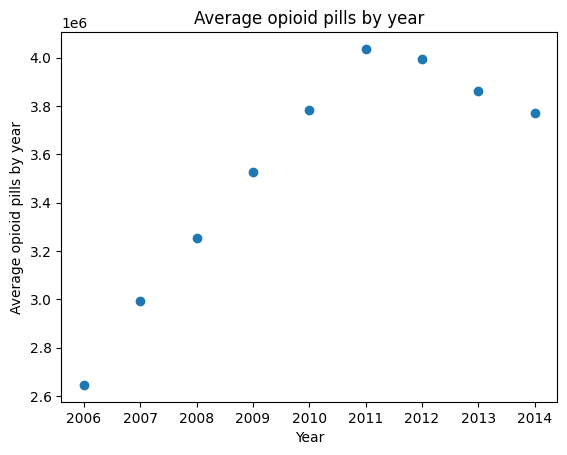

In [2]:
# ***********************************************************************

#  Question # 2
# Create a scatterplot of the average number of opioid pills by year

# calculate average dosage_unit per year from table annual_df

import pandas as pd
import sqlite3 as sq3
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Download the CSV files
!wget https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv
!wget https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv
!wget https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_annual.csv


# Create a connection to the database
con = sq3.connect("opioid.db")

# Read the CSV files into pandas DataFrames
population_df = pd.read_csv('county_pop_arcos.csv')
annual_df = pd.read_csv('county_annual.csv')
land_df = pd.read_csv('land_area.csv')

# Write the DataFrames to tables in the database
# if_exists='replace' will overwrite the table if it already exists
population_df.to_sql('population', con, if_exists='replace', index=False)
annual_df.to_sql('annual', con, if_exists='replace', index=False)
land_df.to_sql('land', con, if_exists='replace', index=False)

# Close the connection
con.close()

print("CSV files imported into opioid.db successfully.")

yearly_summary = annual_df.groupby('year')['DOSAGE_UNIT'].mean().reset_index()
# calculate average dosage_unit per year

yearly_summary.columns = ['Year', 'Avg opioid pills per year']
print(yearly_summary)
plt.scatter(x=yearly_summary['Year'], y=yearly_summary['Avg opioid pills per year'])
plt.xlabel('Year')
plt.ylabel('Average opioid pills by year')
plt.title('Average opioid pills by year')
plt.show()

# *************************************************************************
# Question # 3
# Repeat the steps of loading and merging the opioid data files in R.
# That is, follow the steps of loading and merging the three csv files
#  as well as the data cleaning described in the notes in R.

# Please see attached R file for this

In [5]:
# ***************************************************************************
# Question # 4
# Take your R code from the previous step and call it from python instead of R.
#  Convert the resulting dataset to a pandas dataframe.

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
import pandas as pd

# Activate the pandas to R data frame conversion
pandas2ri.activate()


# Define your R code as a string
r_code = """
library(tidyverse) # Load tidyverse first to make read_csv available
dat = read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv", show_col_types = FALSE) #
head(dat)
dat[1:10, ]
library (tidyverse)
population = read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv", show_col_types = FALSE)
head(population)
population = read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv", show_col_types = FALSE)
population = read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_pop_arcos.csv", show_col_types = FALSE)
land = read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/land_area.csv", show_col_types = FALSE)
head(population)
head(land)
annual = read_csv("https://raw.githubusercontent.com/opencasestudies/ocs-bp-opioid-rural-urban/master/data/simpler_import/county_annual.csv", show_col_types = FALSE)
head(annual)
library(dplyr) # Load dplyr
limited_data <- population %>% #
  select(BUYER_COUNTY, BUYER_STATE, STATE, COUNTY, year, population) %>% #
  head(10) # Replace 10 with your desired limit
head(population)
limited_data <- population %>% #
  select(BUYER_COUNTY, BUYER_STATE, STATE, COUNTY, year, population) %>% #
  head(10) # Replace 10 with your desired limit
population2 = population %>% select(BUYER_COUNTY, BUYER_STATE, STATE, COUNTY, year, population)
head(population2)
annual %>% #
  filter(is.na(countyfips)) %>% #
  slice(1:10)
annual %>% #
  filter(is.na(countyfips), BUYER_STATE != "PR") %>% #
  head(10)
annual$countyfips[annual$BUYER_STATE == "AR" & annual$BUYER_COUNTY == "MONTGOMERY"] <- "05097"
result <- annual %>% #
  filter(BUYER_STATE == "AR", BUYER_COUNTY == "MONTGOMERY")
head(result)
annual <- annual[!is.na(annual$BUYER_COUNTY), ] # Check for non-missing BUYER_COUNTY
head(annual)
land_area <- land %>% #
  select( #
    Areaname = Areaname, #
    STCOU = STCOU, #
    LND110210D = LND110210D #
  )
head(land_area)
land_area <- rename(land_area, countyfips = STCOU)
head(land_area)
nrow(land)
nrow(land_area)
# nrow(county_info) # Commented out as county_info might not be created yet in R
county_info <- left_join(population, land_area, by = "countyfips")
head(county_info) # Print head of county_info
str(county_info) # Print structure of county_info
nrow(county_info) # Ensure nrow() is the last evaluated expression

"""
# call the R code from python


# Execute the R code

r_dataframe = ro.r(r_code)

# Convert the R data frame to a pandas DataFrame
# rpy2 handles the conversion automatically when pandas2ri is activated,
# but you can explicitly convert if needed.
pandas_dataframe = ro.conversion.rpy2py(r_dataframe)

# Print the resulting pandas DataFrame
# display(pandas_dataframe)

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
spc_tbl_ [28,265 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1        : num [1:28265] 1 2 3 4 5 6 7 8 9 10 ...
 $ BUYER_COUNTY: chr [1:28265] "AUTAUGA" "BALDWIN" "BARBOUR" "BIBB" ...
 $ BUYER_STATE : chr [1:28265] "AL" "AL" "AL" "AL" ...
 $ countyfips  : chr [1:28265] "01001" "01003" "01005" "01007" ...
 $ STATE       : num [1:28265] 1 1 1 1 1 1 1 1 1 1 ...
 $ COUNTY      : num [1:28265] 1 3 5 7 9 11 13 15 17 19 ...
 $ county_name : chr [1:28265] "Autauga" "Baldwin" "Barbour" "Bibb" ...
 $ NAME        : chr [1:28265] "Autauga County, Alabama" "Baldwin County, Alabama" "Barbour County, Alabama" "Bibb County, Alabama" ...
 $ variable    : chr [1:28265] "B01003_001" "B01003_001" "B01003_001" "B01003_001" ...
 $ year        : num [1:28265] 2006 2006 2006 2006 2006 ...
 $ population  : num [1:28265] 51328 168121 27861 22099 55485